# Fashion MNIST

In [1]:
import torch
from torchvision import datasets, transforms
import helper

# Normalization
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)


# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)


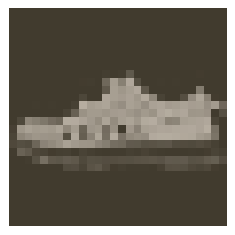

In [2]:
image, label = next(iter(trainloader))
helper.imshow(image[0, :])

# Building the network

In [3]:
import torch.nn.functional as F
from torch import nn
from torch import optim

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.output = nn.Linear(64, 10)
        
    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        
        x = F.log_softmax(self.output(x), dim = 1)
        
        
        return x



        

In [4]:
model = Network()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.01)


epochs = 10

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        output = model.forward(images)
        loss = criterion(output, labels)
                
        # Training pass
        optimizer.zero_grad()
        
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    else:
        print("Training loss: ", running_loss / len(trainloader))
        

Training loss:  0.5858550323669844
Training loss:  0.4658686489041553
Training loss:  0.4312867442014883
Training loss:  0.42776747113034164
Training loss:  0.4096726191037499
Training loss:  0.3949562595215942
Training loss:  0.3963632510542107
Training loss:  0.38935582919606265
Training loss:  0.3891100016579445
Training loss:  0.37522477620859135


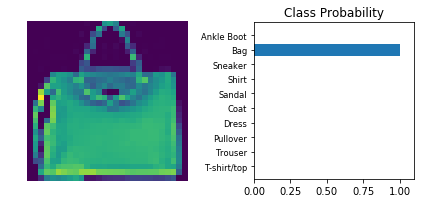

In [7]:
%matplotlib inline
import helper

images, label = next(iter(testloader))

img = images[1].view(1, 784)

with torch.no_grad():
    logs= model(img)


ps = torch.exp(logs)
helper.view_classify(img.view(1, 28, 28), ps, version='Fashion')